## 下载数据集

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

#### 下文代码中地址需要更新为自己的内部存储路径

In [6]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='D:/xmy/6.5数据集（CIFAR10数据集）',train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='D:/xmy/6.5数据集（CIFAR10数据集）',train=True, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## 随机查看部分数据图像

In [10]:
import matplotlib.pyplot as plt
import numpy as np

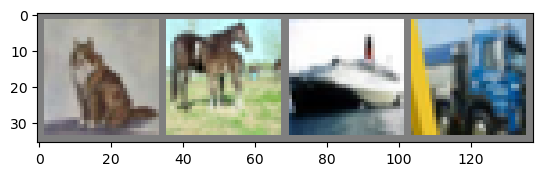

  cat horse  ship truck


In [29]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

# 随机获取部分训练集    
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 显示4张图像
imshow(torchvision.utils.make_grid(images))
# 打印标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 构建网络框架

In [31]:
import torch.nn as nn
import torch.nn.functional as F
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=36, kernel_size=3, stride=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1 = nn.Linear(1296, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        # print(x.shape)
        x = x.view(-1, 36*6*6)  #不改变x的数据，但是按照我自己的意愿将其修改为二维张量，其第二维度为36*6*6=1296，以方便能够输入全连接层
        x = F.relu(self.fc2(F.relu(self.fc1(x))))
        return x


In [35]:
net = CNNNet()
net = net.to(device)

In [37]:
# 查看网络结构
print(net)

# 查看网络中的前四层
nn.Sequential(*list(net.children())[:4])

CNNNet(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 36, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1296, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


Sequential(
  (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Conv2d(16, 36, kernel_size=(3, 3), stride=(1, 1))
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

## 训练模型

### 定义损失函数和优化器

In [41]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [43]:
for epoch in range(10):  #所用数据集一共10个子集
    
    running_loss = 0.0
    # train_acc = 0
    # net.train()
    for i, data in enumerate(trainloader, 0):
        # 获取训练数据
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 权重参数梯度清零
        optimizer.zero_grad()
        
        # 正向及反向传播
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 显示损失值
        running_loss += loss.item()
        
        # _,pred = outputs.max(1)
        # num_correct = (pred == labels).sum().item()
        # acc = num_correct / i.shape[0]
        # acc = num_correct / inputs.size[0]
        # train_acc += acc
        # train_acc += num_correct / inputs.size(0)
        
        
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss/2000))
            # print('Train loss:{:.4f}, Train acc:{:.4f}'.format(running_loss, running_loss/len(trainloader)))
            running_loss = 0.0
    
    # epoch_loss = running_loss / len(trainloader)
    # epoch_acc = train_acc / len(trainloader)
    # losses.append(epoch_loss)
    # acces.append(epoch_acc)
    # print('Epoch: %d, Train loss: %.4f, Train acc: %.4f' % (epoch + 1, epoch_loss, epoch_acc))
            
print('Finished Training')

[1,  2000] loss: 2.255
[1,  4000] loss: 1.888
[1,  6000] loss: 1.610
[1,  8000] loss: 1.500
[1, 10000] loss: 1.394
[1, 12000] loss: 1.302
[2,  2000] loss: 1.186
[2,  4000] loss: 1.169
[2,  6000] loss: 1.134
[2,  8000] loss: 1.106
[2, 10000] loss: 1.066
[2, 12000] loss: 1.047
[3,  2000] loss: 0.930
[3,  4000] loss: 0.917
[3,  6000] loss: 0.943
[3,  8000] loss: 0.940
[3, 10000] loss: 0.924
[3, 12000] loss: 0.911
[4,  2000] loss: 0.796
[4,  4000] loss: 0.788
[4,  6000] loss: 0.807
[4,  8000] loss: 0.820
[4, 10000] loss: 0.812
[4, 12000] loss: 0.794
[5,  2000] loss: 0.665
[5,  4000] loss: 0.693
[5,  6000] loss: 0.715
[5,  8000] loss: 0.703
[5, 10000] loss: 0.723
[5, 12000] loss: 0.743
[6,  2000] loss: 0.587
[6,  4000] loss: 0.589
[6,  6000] loss: 0.628
[6,  8000] loss: 0.632
[6, 10000] loss: 0.642
[6, 12000] loss: 0.657
[7,  2000] loss: 0.485
[7,  4000] loss: 0.519
[7,  6000] loss: 0.561
[7,  8000] loss: 0.555
[7, 10000] loss: 0.580
[7, 12000] loss: 0.588
[8,  2000] loss: 0.418
[8,  4000] 

## 测试模型

In [49]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _,predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 88 %


## 统计模型所用参数

In [53]:
print("net_gyp have {} paramerters in total".format(sum(x.numel() for x in net.parameters())))

net_gyp have 173742 paramerters in total
